In [18]:
import tensorflow as ts
print(ts.__version__)

2.13.0


In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from keras.utils import to_categorical
# from keras.utils.vis_utils import plot_model
from keras.datasets import fashion_mnist
from keras import layers
from keras.models import Sequential
# from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Dropout, Flatten,Conv2D, MaxPooling2D, BatchNormalization
from sklearn.metrics import confusion_matrix, classification_report

In [9]:

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [10]:
print(y_train)

[9 0 0 ... 3 0 5]


In [12]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [13]:
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

In [14]:
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255
     

In [15]:

y_train =to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [16]:
print(y_train)

[[0. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [17]:

model =Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

C:\Users\HP\anaconda3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


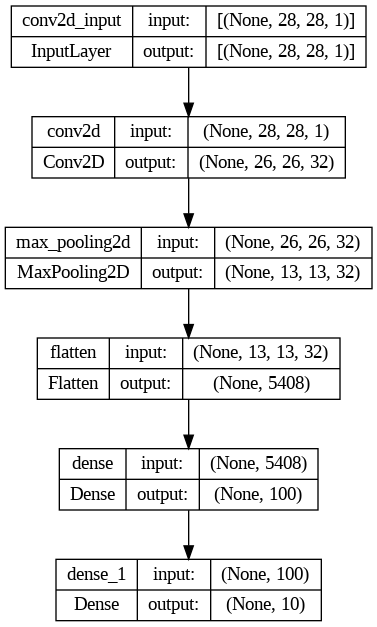

In [8]:
plot_model(model, to_file='fmnistcnn.png',show_shapes=True, show_layer_names=True)
     

In [18]:
history = model.fit(X_train, y_train, epochs=15, batch_size=32)

Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 12ms/step - accuracy: 0.8238 - loss: 0.4953
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9065 - loss: 0.2604
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9229 - loss: 0.2101
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9326 - loss: 0.1796
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.9432 - loss: 0.1532
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9530 - loss: 0.1276
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9590 - loss: 0.1109
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9667 - loss: 0.0937
Epoch 9/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9717 - loss: 0.0792
Epoch 10/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9748 - loss: 0.0702
Epoch 11/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9796 - loss: 0.0572
Epoch 12

In [19]:
train_loss, train_acc = model.evaluate(X_train, y_train)
test_loss, test_acc = model.evaluate(X_test, y_test)

print("Train accuracy:", round(train_acc, 5))
print("Train loss:", round(train_loss, ))

print("Test accuracy:", round(test_acc, 5))
print("Test loss:", round(test_loss, 3))

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9878 - loss: 0.0355
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9064 - loss: 0.4578
Train accuracy: 0.98753
Train loss: 0
Test accuracy: 0.9083
Test loss: 0.431


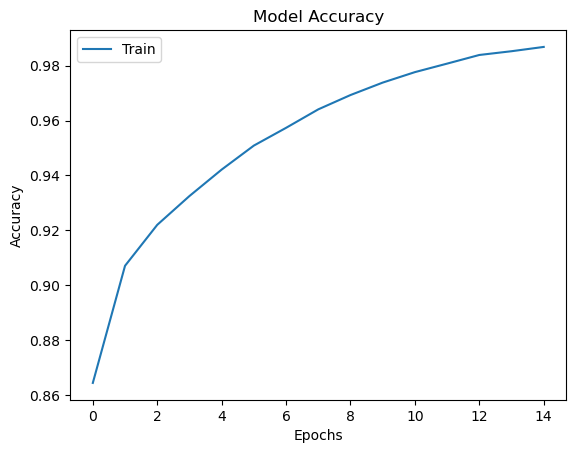

In [20]:
plt.plot(history.history["accuracy"])
#plt.plot(history.history["val_accuracy"])
plt.title("Model Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'])
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
[[8.8446445e-10 3.3510549e-21 1.0000000e+00 4.4847801e-17 1.7234702e-12
  1.2953292e-18 7.6762885e-10 4.9175569e-22 2.1213299e-18 2.3988566e-23]]
Pullover
Prediction for Image :  Pullover


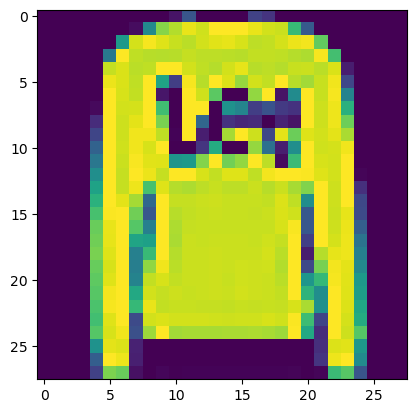

In [28]:
plt.imshow(X_test[1])
img = X_test[1].reshape(-1, 28, 28, 1)

prediction_array=model.predict(img)
print(prediction_array)
max_index = np.argmax(prediction_array)
true_value = np.argmax(y_test[1])
print(class_names[true_value])
print("Prediction for Image : ",class_names[max_index])